# Aim : Demostrate Data Imputation with satistical techniques on numerical values and write down the conclusion about the assumption.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("titanic_toy - titanic_toy.csv")

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [9]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [10]:
x = df.drop(columns = ['Survived']) # independent Columns

In [11]:
y = df['Survived'] #dependent columns

In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
df.shape

(891, 4)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
x_train.shape

(712, 3)

In [32]:
x_test.shape

(179, 3)

In [35]:
mean_age = x_train["Age"].mean()

In [36]:
mean_age

29.78590425531915

In [28]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [37]:
median_age  = x_train["Age"].median()

In [38]:
median_age

28.75

In [40]:
mean_fare = x_train['Fare'].mean()
mean_fare

32.617596893491076

In [42]:
median_fare = x_train['Fare'].median()
median_fare

14.4583

In [46]:
#imputation


x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Age_median']=x_train['Age'].fillna(median_age)


In [48]:
x_train

,Age,Fare,Family,Age_mean,Age_median
30,40.0,27.7208,0,40.000000,40.00
10,4.0,16.7000,2,4.000000,4.00
873,47.0,9.0000,0,47.000000,47.00
182,9.0,31.3875,6,9.000000,9.00
876,20.0,9.8458,0,20.000000,20.00
...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00
584,NaN,8.7125,0,29.785904,28.75
493,71.0,49.5042,0,71.000000,71.00
527,NaN,221.7792,0,29.785904,28.75


In [50]:
x_train['Fare_mean']=x_train['Fare'].fillna(mean_age)
x_train['Fare_median']=x_train['Fare'].fillna(median_age)

In [51]:
x_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [63]:
print('Original age variance',x_train["Age"].var())

Original age variance 204.3495133904614


In [64]:
print("After imputation age variance of age",x_train['Age_mean'].var())
print("After imputation age variance of age",x_train['Age_median'].var())

After imputation age variance of age 161.81262452718673
After imputation age variance of age 161.9895663346054


In [65]:
print('Original age variance',x_train["Fare"].var())

Original age variance 2448.197913706318


In [66]:
print("After imputation age variance of age",x_train['Fare_mean'].var())
print("After imputation age variance of age",x_train['Fare_median'].var())

After imputation age variance of age 2324.623996772905
After imputation age variance of age 2324.9576136149317


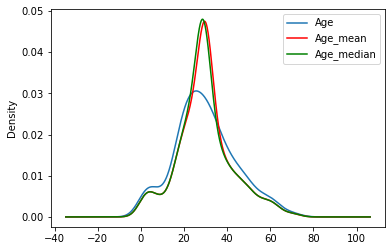

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind='kde' ,ax=ax) #original Distribution
#After imputaion with mean
x_train['Age_mean'].plot(kind='kde', ax=ax,color='red')
#After imputation with median
x_train['Age_median'].plot(kind='kde' ,ax=ax,color='green')
#Adding legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

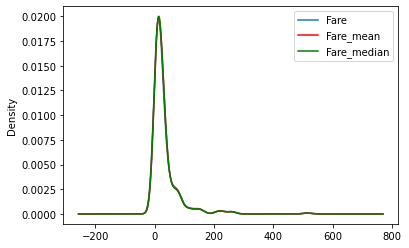

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind='kde' ,ax=ax) #original Distribution
#After imputaion with mean
x_train['Fare_mean'].plot(kind='kde', ax=ax,color='red')
#After imputation with median
x_train['Fare_median'].plot(kind='kde' ,ax=ax,color='green')
#Adding legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [80]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [81]:
imputer1= SimpleImputer(strategy='mean')
imputer2= SimpleImputer(strategy='median')

In [82]:
trf =ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Age']),
],remainder='passthrough')

In [83]:
trf.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [84]:
trf.named_transformers_['imputer1'].statistics_

array([29.69911765])

In [85]:
trf.named_transformers_['imputer2'].statistics_

array([28.])

In [87]:
sm = trf.transform(df)
sm

array([[22.        , 22.        ,  7.25      ,  1.        ,  0.        ],
       [38.        , 38.        , 71.2833    ,  1.        ,  1.        ],
       [26.        , 26.        ,  7.925     ,  0.        ,  1.        ],
       ...,
       [29.69911765, 28.        , 23.45      ,  3.        ,  0.        ],
       [26.        , 26.        ,         nan,  0.        ,  1.        ],
       [32.        , 32.        ,  7.75      ,  0.        ,  0.        ]])

# Conclusion:   
**We have observed while finding the mean and median of Age and Fare columns,replacing nulls values of both the columns are highly affected the data distribution while the replacing the null values with median are less afftected compare to mean. Also, if nulls values are less than 5% in the column, the data distribtuion is not affected after replacing the values by mean/median.**